In [3]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install qaznltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


We need PyPDF2 to return text from pdf. Since it is not csv nor txt file we can't just use open() and read()

<h1>Көшпенділер</h1>

<h2>Көшпенділер 1ші кітап</h2>

In [1]:
from PyPDF2 import PdfReader

def pdf_to_txt(pdf_path, txt_path):
    reader = PdfReader(pdf_path)
    with open(txt_path, "w", encoding="utf-8") as f:
        for count, page in enumerate(reader.pages):
            text = page.extract_text() 
            f.write(text + "\f")
    print(f"PDF успешно сконвертирован в TXT: {txt_path}")


pdf_file = r"C:/Users/missk/Downloads/көшпенділер1.pdf"
txt_file = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1txt.txt"

pdf_to_txt(pdf_file, txt_file)

PDF успешно сконвертирован в TXT: C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1txt.txt


In [2]:
def extract_text_from_txt(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    pages = text.split("\f")
    return [p for p in pages if p.strip()]


txt_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1txt.txt"
pages = extract_text_from_txt(txt_path)

print("Всего страниц в файле:", len(pages))

for count in range(len(pages)):  
    print(f"\n=== Страница {count} ===\n")
    print(pages[count][:10000])

Всего страниц в файле: 340

=== Страница 0 ===

 
 
 
  
Әдеби  KZ 
Көшпенділер  
Алмас Қылыш  
Ілияс Есенберлин  
11/5/2012  
 

=== Страница 1 ===

1 
Iлияс Есенберлин . «Алмас Қ ылыш » (Көшпенд iлер – 1) © «I. Есенберлин  атында ғы қор», 2004  
Әдеби KZ   
  
Мазмұн  
Оқырмандарға сөз  ................................ ................................ ................................ ................................ .... 2 
Бірінші бөлім  ................................ ................................ ................................ ................................ ............  4 
I ................................ ................................ ................................ ................................ ..............................  4 
ІІ ................................ ................................ ................................ ................................ ...........................  49 
*   *   * ................................ ..........................

<h3>Cleaning</h3>

In [12]:
import re

def extract_text_from_txt(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    pages = text.split("\f")
    return [p for p in pages if p.strip()]

def remove_inline_numbers(text):
    text = re.sub(r'\s\d+\s', ' ', text) 
    text = re.sub(r'^\d+\s', '', text)
    text = re.sub(r'\s\d+$', '', text)
    return text

def clean_page_content(text):
    lines = text.split('\n')
    cleaned_lines = []

    skip_first_number = True
    max_header_lines = 2  
    header_lines_removed = 0

    for line in lines:
        stripped = line.strip()

        if skip_first_number and stripped.isdigit():
            skip_first_number = False
            continue

        if stripped and stripped[0].isdigit() and '—' in stripped:
            continue

        if header_lines_removed < max_header_lines:
            if any(key in line for key in [
                "Ілияс Есенберлин",
                "Iлияс Есенбер",
                "Алмас Қылыш",
                "Алмас Қ ылыш",
                "Көшпенд",    
                "Әдеби KZ",
                "Эдеби KZ",
                "©"
            ]):
                header_lines_removed += 1
                continue  

        stripped = remove_inline_numbers(stripped)

        if stripped: 
            cleaned_lines.append(stripped)

    return '\n'.join(cleaned_lines).strip()

txt_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1txt.txt"
output_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"

pages = extract_text_from_txt(txt_path)

with open(output_path, "w", encoding="utf-8") as f:
    for count, page_text in enumerate(pages):
        if count in (0, 1):  
            continue

        cleaned_content = clean_page_content(page_text)
        if cleaned_content:
            f.write(cleaned_content + "\n\n")

print(f"Очищенный текст сохранён в: {output_path}")


Очищенный текст сохранён в: C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt


In [16]:
file_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

pages = text.split("\f")

for i, page in enumerate(pages, start=1):
    print(page)


Оқырмандарға  сөз
Қымбатты  достар!  Сіздер  Ілияс  Есенберлиннің  атақты  «Көшпенділер»  трилогиясын
қолға  алып  отырсыздар.  Кітап  жалпы  таралымы  үш миллион  данамен  елу реттен
аса шығарылып,  қазірдің  өзінде  отыз  тілге  аударылса  да, бұл жолғы  басылымның
тәуелсіз  Қазақстанның  қалыптасу  кезеңінде  алғаш  рет жүзеге  асырылуы  назар
аударарлық  оқиға  болып  отыр.  Осы  арқылы  аса көрнекті  жазушының
шығармашылығын  қастерлеушілер  мен  бағалаушыларға,  біздің  тарихымызды
қымбат  көретін  барша  жұртшылыққа  бұл шығармаға  жаңаша  — ежелден
азаттыққа  ұмтылып,  ұлттық  тәуелсіздік  үшін  ерлікпен  күрескен  қазақ  халқының
жүзеге  асқан  арманы  тұрғысынан  қарауға  мүмкіндік  беріледі.
Бүгінгі  таңда  трилогияны  қайта  оқи отырып,  егемендік  алу ісіне  біздің
бабаларымыз  — Әбілқайыр,  Абылай,  Кенесары хандар, Наурызбай, Қобланды,
Бөгенбай батырлар, Төле би, Асанқайғы, Бұқар жырау сынды даналар
қаншалықты зор үлес қосқанын ерекше түйсініп, пайымдайсың... Олар, олард

<h3>Analysis</h3>

In [1]:
from qaznltk import QazNLTK

qn = QazNLTK()

file_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

sentences = qn.sent_tokenize(text)

sentences = [s for s in sentences if s.strip()]

# Note: sentimize() returns -1 (negative), 0 (neutral), 1 (positive)
scores = [qn.sentimize(s) for s in sentences]


positive = sum(1 for s in scores if s == 1)
negative = sum(1 for s in scores if s == -1)
neutral = sum(1 for s in scores if s == 0)

print(f"Positive: {positive}, Negative: {negative}, Neutral: {neutral}")

if positive > negative and positive > neutral:
    print("Majority of sentences are positive ✅")
elif negative > positive and negative > neutral:
    print("Majority of sentences are negative ❌")
elif neutral > positive and neutral > negative:
    print("Majority of sentences are neutral ⚖️")
else:
    print("No clear majority, counts are close.")



Positive: 1111, Negative: 795, Neutral: 3347
Majority of sentences are neutral ⚖️


In [4]:
import re
from collections import Counter

def find_top_words(txt_file, top_n=20):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()

    text = text.lower()

    words = re.findall(r'\b\w+\b', text)

    words = [word for word in words if len(word) > 5]

    word_counter = Counter(words)

    return word_counter.most_common(top_n)

txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
top_words = find_top_words(txt_file, top_n=20)

print("Топ-20 самых часто упоминаемых слов в книге 1:")
print("=" * 40)
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i}. {word}: {count} раз")

Топ-20 самых часто упоминаемых слов в книге 1:
1. әбілқайыр: 347 раз
2. сұлтан: 327 раз
3. жәнібек: 302 раз
4. жатқан: 247 раз
5. мұхамед: 236 раз
6. қыпшақ: 218 раз
7. ханның: 190 раз
8. қалған: 155 раз
9. болған: 153 раз
10. өзінің: 137 раз
11. бұрындық: 134 раз
12. келген: 133 раз
13. баласы: 128 раз
14. тұрған: 122 раз
15. қандай: 108 раз
16. кеткен: 105 раз
17. тәрізді: 105 раз
18. отырған: 104 раз
19. әбілқайырдың: 99 раз
20. екенін: 99 раз


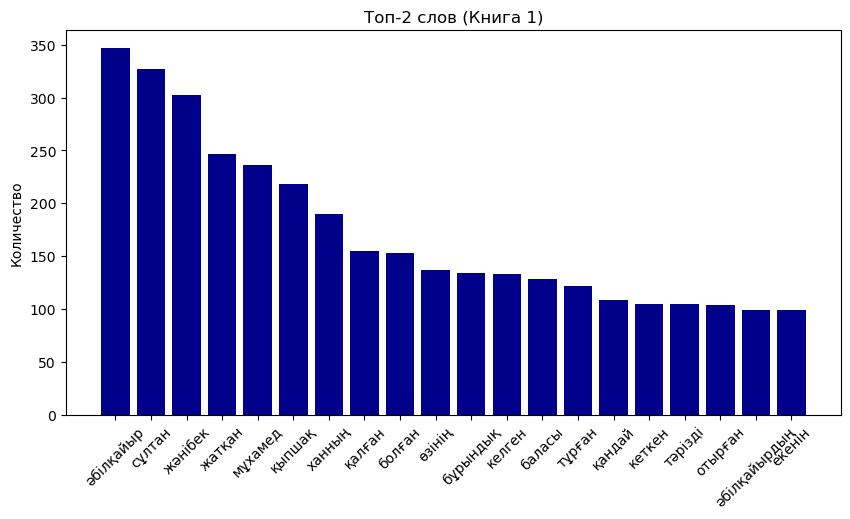

In [5]:
import matplotlib.pyplot as plt
txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
top_words1 = find_top_words(txt_file, top_n=20)

words1 = [w for w, c in top_words1]
counts1 = [c for w, c in top_words1]

plt.figure(figsize=(10,5))
plt.bar(words1, counts1, color='darkblue')
plt.title("Топ-2 слов (Книга 1)")
plt.xticks(rotation=45)
plt.ylabel("Количество")
plt.show()


In [150]:
import re
from collections import Counter

def analyze_text_like_word(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    words = re.findall(r'\b\w+\b', text.lower())
    
    total_words = len(words)
    
    return {
        'total_words': total_words,
    }

txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
stats = analyze_text_like_word(txt_file)

print("Статистика: ")
print("=" * 30)
print(f"Общее количество слов: {stats['total_words']}")

Статистика: 
Общее количество слов: 88235


In [2]:
output_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
from collections import Counter
import re

with open(output_path, "r", encoding="utf-8") as f:
    text = f.read()

words = re.findall(r'\b\w+\b', text.lower())
words = [word for word in words if len(word) > 1]
word_counts = Counter(words)

unique_words = [word for word, count in word_counts.items() if count == 1]

print("Количество уникальных слов, встречающихся один раз:", len(unique_words))

Количество уникальных слов, встречающихся один раз: 11029


In [3]:
import re

file_path = 'C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

sentences = re.split(r'[.!?]+[\n\s"»“]*', text)
sentences = [s.strip() for s in sentences if s.strip()]

word_counts = [len(re.findall(r'\w+', s, re.UNICODE)) for s in sentences]
total_sentences = len(sentences)
avg_sentence_length = sum(word_counts) / total_sentences if total_sentences > 0 else 0

print(f"Количество предложений в книге: {total_sentences}, Средняя длина предложений: {round(avg_sentence_length, 2)} слов")

Количество предложений в книге: 7497, Средняя длина предложений: 11.77 слов


<h2>Көшпенділер 2ші кітап</h2>

In [9]:
from PyPDF2 import PdfReader

def pdf_to_txt(pdf_path, txt_path):
    reader = PdfReader(pdf_path)
    with open(txt_path, "w", encoding="utf-8") as f:
        for count, page in enumerate(reader.pages):
            text = page.extract_text() 
            f.write(text + "\f")
    print(f"PDF успешно сконвертирован в TXT: {txt_path}")


pdf_file = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2.pdf"
txt_file = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2txt.txt"

pdf_to_txt(pdf_file, txt_file)

PDF успешно сконвертирован в TXT: C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2txt.txt


In [10]:
def extract_text_from_txt(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    pages = text.split("\f")
    return [p for p in pages if p.strip()]  


txt_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2txt.txt"
pages = extract_text_from_txt(txt_path)

print("Всего страниц в файле:", len(pages))

for count in range(len(pages)):  
    print(f"\n=== Страница {count} ===\n")
    print(pages[count][:10000])

Всего страниц в файле: 337

=== Страница 0 ===

 
 
 
Әдеби KZ 
Көшпенділер  2 
Жанталас  
Ілияс Есенберлин  
11/6/2012  
 

=== Страница 1 ===

1 
Әдеби KZ  
Мазмұн  
Пролог  ................................ ................................ ................................ ................................ .......................  2 
Бірінші бөлім  ................................ ................................ ................................ ................................ ............  4 
І ................................ ................................ ................................ ................................ ..............................  4 
ІІ ................................ ................................ ................................ ................................ ...........................  26 
Екінші бӨлім  ................................ ................................ ................................ ................................ ..........  97 
І

<h3>Cleaning</h3>

In [11]:
def extract_text_from_txt(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    pages = text.split("\f")
    return [p for p in pages if p.strip()]

def clean_page_content(text):
    lines = text.split('\n')
    cleaned_lines = []

    skip_first_number = True
    max_header_lines = 2  
    header_lines_removed = 0

    for line in lines:
        stripped = line.strip()

        if skip_first_number and stripped.isdigit():
            skip_first_number = False
            continue

        if header_lines_removed < max_header_lines:
            if any(key in line for key in [
                "Ілияс Есенберлин",
                "Iлияс Есенбер",
                "Алмас Қылыш",
                "Алмас Қ ылыш",
                "Көшпенд",    
                "Әдеби KZ",
                "Эдеби KZ",
                "©"
            ]):
                header_lines_removed += 1
                continue  

        cleaned_lines.append(line)

    return '\n'.join(cleaned_lines).strip()

txt_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2txt.txt"
output_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"

pages = extract_text_from_txt(txt_path)

with open(output_path, "w", encoding="utf-8") as f:
    for count, page_text in enumerate(pages):
        if count in (0, 1):
            continue

        cleaned_content = clean_page_content(page_text)
        if cleaned_content:
            f.write(cleaned_content + "\n\n")

print(f"Очищенный текст сохранён в: {output_path}")


Очищенный текст сохранён в: C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt


In [19]:
file_path = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

pages = text.split("\f")

for i, page in enumerate(pages, start=1):
    print(page)

Қазақтың ұлы даласын күнгей мен күншығыс жағынан алып тағадай иіле түсіп,  
мыңдаған шақырымға созылған дүние жүзіндегі ең биік таулар қоршап жатыр. 
Осы ақ басты ғажайып шың, құздар қазақ жерінің үстінен өтетін ескек желге, 
азынаған дауыл -боранға ғана тосқауыл емес, бұл таулар көшкен елге де, 
басқыншы жаудың қалың қолына да асу б ермес берік қамал. Тек бір жерінде ғана 
бұл ғаламат қиялар, шөккен нардай, даланың бауырына кіре, жатаған тартқан. 
Осы тұстан Азия мен Европаның түйіскен алқабына қарай, жаратылыстың өзі 
жаратқан долы сұрапылымен бірге, араларына жүздеген жылдар салып фанг фур 
ұлы хандарының, Әтилланың, Шыңғыстың құмырсқадай құжынаған қосындары 
төгілген. Бұл қанды жорықтар ең алдымен осы арада әлмисақтан бері егін егіп, 
мал бағып, қала салып, бейбіт жатқан елдерді талқандады. Одан өтіп қазақтың 
көшпенді байтақ даласын қызыл қанға бояп, лек -легімен күнбатысқа қарай лап 
қойды. Бұлар басып өткен жерде тек күңіренген ел, күйзелген дала, күйреген қала 
ғана қалды.  
 Б

<h3>Analysis</h3>

In [1]:
from qaznltk import QazNLTK

qn = QazNLTK()

file_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

sentences = qn.sent_tokenize(text)

sentences = [s for s in sentences if s.strip()]

# Note: sentimize() returns -1 (negative), 0 (neutral), 1 (positive)
scores = [qn.sentimize(s) for s in sentences]


positive = sum(1 for s in scores if s == 1)
negative = sum(1 for s in scores if s == -1)
neutral = sum(1 for s in scores if s == 0)

print(f"Positive: {positive}, Negative: {negative}, Neutral: {neutral}")

if positive > negative and positive > neutral:
    print("Majority of sentences are positive ✅")
elif negative > positive and negative > neutral:
    print("Majority of sentences are negative ❌")
elif neutral > positive and neutral > negative:
    print("Majority of sentences are neutral ⚖️")
else:
    print("No clear majority, counts are close.")



Positive: 1155, Negative: 875, Neutral: 5463
Majority of sentences are neutral ⚖️


In [2]:
import re
from collections import Counter

def find_top_words(txt_file, top_n=20):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()

    text = text.lower()

    words = re.findall(r'\b\w+\b', text)

    words = [word for word in words if len(word) > 5]

    word_counter = Counter(words)

    return word_counter.most_common(top_n)

txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"
top_words = find_top_words(txt_file, top_n=20)

print("Топ-20 самых часто упоминаемых слов в книге 2:")
print("=" * 40)
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i}. {word}: {count} раз")

Топ-20 самых часто упоминаемых слов в книге 2:
1. абылай: 393 раз
2. жоңғар: 246 раз
3. әбілқайыр: 233 раз
4. жатқан: 227 раз
5. қалған: 153 раз
6. жүздің: 150 раз
7. болған: 143 раз
8. келген: 131 раз
9. ханның: 124 раз
10. тұрған: 120 раз
11. екенін: 119 раз
12. сұлтан: 119 раз
13. россия: 114 раз
14. тәуекел: 111 раз
15. абылайдың: 111 раз
16. өзінің: 109 раз
17. әскері: 107 раз
18. отырған: 103 раз
19. қандай: 99 раз
20. қалден: 96 раз


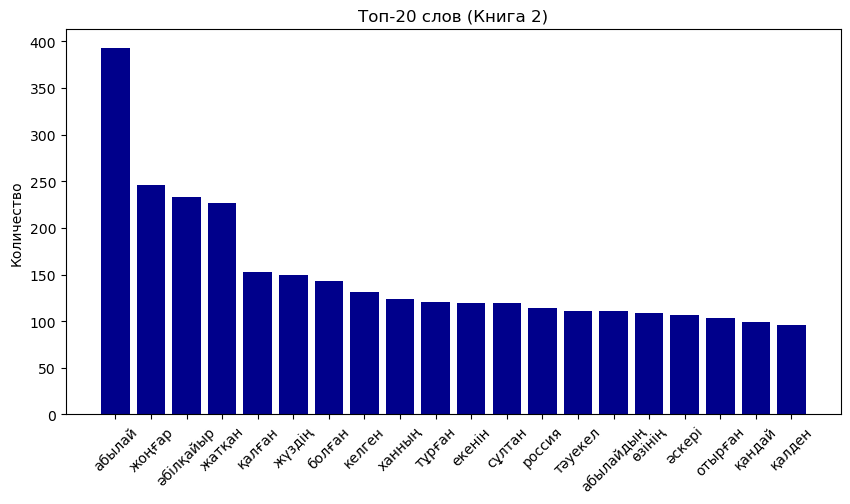

In [3]:
import matplotlib.pyplot as plt
txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"
top_words2 = find_top_words(txt_file, top_n=20)

words2 = [w for w, c in top_words2]
counts2 = [c for w, c in top_words2]

plt.figure(figsize=(10,5))
plt.bar(words2, counts2, color='darkblue')
plt.title("Топ-20 слов (Книга 2)")
plt.xticks(rotation=45)
plt.ylabel("Количество")
plt.show()

In [7]:
import re
from collections import Counter

def analyze_text_like_word(txt_file):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
        
    words = re.findall(r'\b\w+\b', text.lower())
    
    total_words = len(words)
    
    return {
        'total_words': total_words,
    }

txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"
stats = analyze_text_like_word(txt_file)

print("Статистика: ")
print("=" * 30)
print(f"Общее количество слов: {stats['total_words']}")

Статистика: 
Общее количество слов: 83414


In [3]:
output_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"
from collections import Counter
import re

with open(output_path, "r", encoding="utf-8") as f:
    text = f.read()

words = re.findall(r'\b\w+\b', text.lower())

word_counts = Counter(words)

unique_words = [word for word, count in word_counts.items() if count == 1]

print("Количество уникальных слов, встречающихся один раз:", len(unique_words))

Количество уникальных слов, встречающихся один раз: 10712


In [136]:
import re

file_path = 'C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

sentences = re.split(r'[.!?]+[\n\s"»“]*', text)
sentences = [s.strip() for s in sentences if s.strip()]

word_counts = [len(re.findall(r'\w+', s, re.UNICODE)) for s in sentences]
total_sentences = len(sentences)
avg_sentence_length = sum(word_counts) / total_sentences if total_sentences > 0 else 0

print(f"Количество предложений в книге: {total_sentences}, Средняя длина предложений: {round(avg_sentence_length, 2)} слов")

Количество предложений в книге: 7772, Средняя длина предложений: 10.73 слов


<h2>Көшпенділер бірінші + екінші</h2>

In [32]:
file1 = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
file2 = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"

merged_file = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"

with open(file1, "r", encoding="utf-8") as f1, \
     open(file2, "r", encoding="utf-8") as f2:
    text1 = f1.read()
    text2 = f2.read()

with open(merged_file, "w", encoding="utf-8") as out:
    out.write(text1 + "\n\n" + text2)

print(f"Два файла объединены в: {merged_file}")


Два файла объединены в: C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt


In [2]:
import re
from collections import Counter

def find_top_words(txt_file, top_n=20):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()

    text = text.lower()

    words = re.findall(r'\b\w+\b', text)

    words = [word for word in words if len(word) > 5]

    word_counter = Counter(words)

    return word_counter.most_common(top_n)

txt_file = "C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"
top_words = find_top_words(txt_file, top_n=20)

print("Топ-20 самых часто упоминаемых слов в обоих книгах объединённых вместе:")
print("=" * 40)
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i}. {word}: {count} раз")

Топ-20 самых часто упоминаемых слов в обоих книгах объединённых вместе:
1. әбілқайыр: 580 раз
2. жатқан: 474 раз
3. сұлтан: 446 раз
4. абылай: 395 раз
5. жәнібек: 336 раз
6. ханның: 315 раз
7. қалған: 308 раз
8. болған: 296 раз
9. келген: 264 раз
10. жоңғар: 254 раз
11. өзінің: 246 раз
12. мұхамед: 244 раз
13. тұрған: 242 раз
14. қыпшақ: 231 раз
15. екенін: 218 раз
16. отырған: 207 раз
17. қандай: 207 раз
18. баласы: 203 раз
19. шыққан: 194 раз
20. кеткен: 184 раз


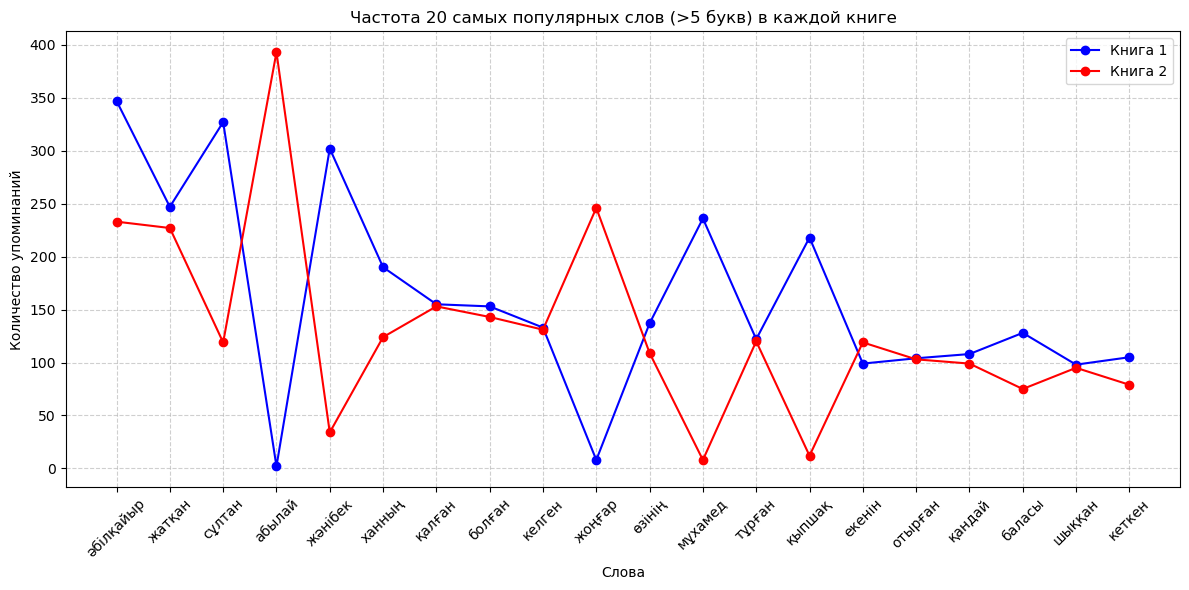

In [7]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def count_all_words(txt_file, n=1):
    with open(txt_file, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    words = [w for w in words if len(w) > n]
    return Counter(words)

file1 = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
file2 = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер2_очищенный.txt"
merged = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"

counter1 = count_all_words(file1, n=5)
counter2 = count_all_words(file2, n=5)
merged_counter = count_all_words(merged, n=5)

top10_words = [w for w, c in merged_counter.most_common(20)]

counts_book1 = [counter1[w] for w in top10_words]
counts_book2 = [counter2[w] for w in top10_words]

plt.figure(figsize=(12,6))
plt.plot(top10_words, counts_book1, marker='o', color='blue', label='Книга 1')
plt.plot(top10_words, counts_book2, marker='o', color='red', label='Книга 2')
plt.title("Частота 20 самых популярных слов (>5 букв) в каждой книге")
plt.xlabel("Слова")
plt.ylabel("Количество упоминаний")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
from qaznltk import QazNLTK

qn = QazNLTK()

file_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

sentences = qn.sent_tokenize(text)

sentences = [s for s in sentences if s.strip()]

# Note: sentimize() returns -1 (negative), 0 (neutral), 1 (positive)
scores = [qn.sentimize(s) for s in sentences]


positive = sum(1 for s in scores if s == 1)
negative = sum(1 for s in scores if s == -1)
neutral = sum(1 for s in scores if s == 0)

print(f"Positive: {positive}, Negative: {negative}, Neutral: {neutral}")

if positive > negative and positive > neutral:
    print("Majority of sentences are positive ✅")
elif negative > positive and negative > neutral:
    print("Majority of sentences are negative ❌")
elif neutral > positive and neutral > negative:
    print("Majority of sentences are neutral ⚖️")
else:
    print("No clear majority, counts are close.")



Positive: 2438, Negative: 1814, Neutral: 10459
Majority of sentences are neutral ⚖️


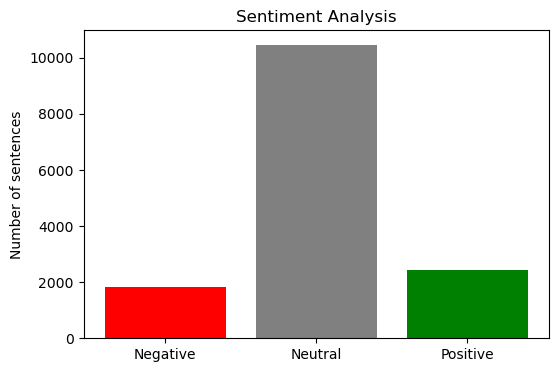

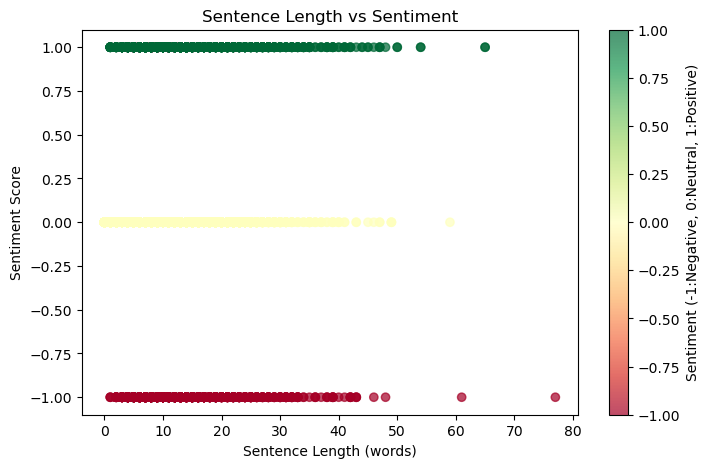

In [5]:
from qaznltk import QazNLTK
import matplotlib.pyplot as plt
from collections import Counter

qn = QazNLTK()

file_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

sentences = qn.sent_tokenize(text)
sentences = [s for s in sentences if s.strip()]  # remove empty sentences

scores = [qn.sentimize(s) for s in sentences]
positive = sum(1 for s in scores if s == 1)
negative = sum(1 for s in scores if s == -1)
neutral = sum(1 for s in scores if s == 0)

plt.figure(figsize=(6,4))
plt.bar(['Negative','Neutral','Positive'], [negative, neutral, positive], color=['red','gray','green'])
plt.title("Sentiment Analysis")
plt.ylabel("Number of sentences")
plt.show()

tokens = qn.tokenize(text)
words, freqs = zip(*tokens)  

sentence_lengths = [len(qn.tokenize(s)) for s in sentences]

plt.figure(figsize=(8,5))
plt.scatter(sentence_lengths, scores, c=scores, cmap='RdYlGn', alpha=0.7)
plt.colorbar(label='Sentiment (-1:Negative, 0:Neutral, 1:Positive)')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Sentiment Score")
plt.title("Sentence Length vs Sentiment")
plt.show()


In [3]:
output_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер_объединённый.txt"
from collections import Counter
import re

with open(output_path, "r", encoding="utf-8") as f:
    text = f.read()

words = re.findall(r'\b\w+\b', text.lower())

word_counts = Counter(words)

unique_words = [word for word, count in word_counts.items() if count == 1]

print("Количество уникальных слов, встречающихся один раз за обе книги:", len(unique_words))

Количество уникальных слов, встречающихся один раз за обе книги: 15996


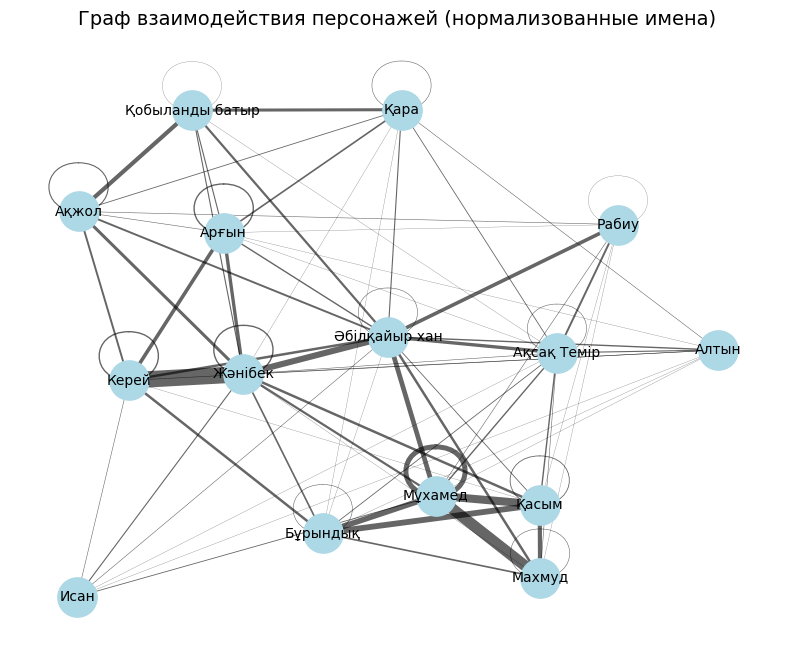

In [6]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import re

file_path = r"C:/Users/missk/OneDrive/Рабочий стол/көшпенділер1_очищенный.txt"
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")

# Пробуем токенизацию через nltk, fallback на regex
try:
    sentences = nltk.sent_tokenize(text, language="russian")
except:
    sentences = re.split(r'[.!?]\s+', text)

stop_names = {"Бұл", "Ал", "Осы", "Бірақ", "Орда", "Мынау", "Сол", "Ол", 
              "Хан", "Қыпшақ", "Дешті", "Әбілқайырдың", "Дәшті", "Түркістан", "Қыпшақтың"}

normalize = {
    "Ақсақ": "Ақсақ Темір",
    "Темір": "Ақсақ Темір",
    "Ақсақ Темір": "Ақсақ Темір",
    "Әбілқайыр": "Әбілқайыр хан",
    "Әбілқайыр хан": "Әбілқайыр хан",
    "Қобыланды": "Қобыланды батыр",
    "Қобыланды батыр": "Қобыланды батыр",
    "Асан": "Асан Қайғы",
    "Қайғы": "Асан Қайғы",
    "Асан Қайғы": "Асан Қайғы"
}

characters_per_sentence = []

for sent in sentences:
    words = nltk.word_tokenize(sent, language="russian")
    characters = []
    i = 0
    while i < len(words):
        if i < len(words) - 1:
            bigram = words[i] + " " + words[i+1]
            if bigram in normalize:
                characters.append(normalize[bigram])
                i += 2
                continue

        if words[i][0].isupper() and words[i] not in stop_names:
            if words[i] in normalize:
                characters.append(normalize[words[i]])
            else:
                characters.append(words[i])
        i += 1

    if len(characters) > 1:
        characters_per_sentence.append(characters)

all_chars = [c for chars in characters_per_sentence for c in chars]
char_counts = Counter(all_chars)

filtered_chars = [c for c, freq in char_counts.items() if freq >= 5]

G = nx.Graph()
for chars in characters_per_sentence:
    chars = [c for c in chars if c in filtered_chars]
    for i in range(len(chars)):
        for j in range(i + 1, len(chars)):
            if G.has_edge(chars[i], chars[j]):
                G[chars[i]][chars[j]]['weight'] += 1
            else:
                G.add_edge(chars[i], chars[j], weight=1)

top_chars = [c for c, freq in char_counts.most_common(15)]
G = G.subgraph(top_chars)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.7)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=[d['weight']*0.2 for (u,v,d) in G.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("Граф взаимодействия персонажей (нормализованные имена)", fontsize=14)
plt.axis("off")
plt.show()


<h1>Satu.kz</h1>

<h2>Scrapping</h2>

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import time

headers = {"User-Agent": "Mozilla/5.0"}
all_products = []

def translate_availability(raw_av):
    if not raw_av:
        return None
    av = raw_av.strip().lower()
    if av == "instock":
        return "В наличии"
    elif av == "preorder":
        return "Предзаказ"
    elif av == "outofstock":
        return "Нет в наличии"
    else:
        return raw_av  

for page in range(1, 300):
    url = f"https://satu.kz/Vse-tovary;{page}.html"
    resp = requests.get(url, headers=headers)
    soup = BeautifulSoup(resp.text, "html.parser")
    
    product_blocks = soup.find_all("div", {"data-qaid": "product_block"})
    
    for block in product_blocks:
        try:
            script_tag = block.find("script", {"type": "application/ld+json"})
            if script_tag:
                data = json.loads(script_tag.string)
                price_tag = block.find("div", {"data-qaid": "product_price"})
                price = price_tag.get_text(strip=True) if price_tag else None

                raw_av = (data.get("offers", {}).get("availability") or "").split("/")[-1]
                availability = translate_availability(raw_av)

                product = {
                    "name": data.get("name"),
                    "description": data.get("description"),
                    "price": price,
                    "availability": availability,
                    "seller": data.get("offers", {}).get("seller", {}).get("name")
                }
            else:
                name = block.find("span", {"data-qaid": "product_name"})
                price_tag = block.find("div", {"data-qaid": "product_price"})
                availability_tag = block.find("span", {"data-qaid": "product_presence"})
                seller_tag = block.find("span", {"data-qaid": "company_name"})

                product = {
                    "name": name.get_text(strip=True) if name else None,
                    "description": None,
                    "price": price_tag.get_text(strip=True) if price_tag else None,
                    "availability": translate_availability(availability_tag.get_text(strip=True)) if availability_tag else None,
                    "seller": seller_tag.get_text(strip=True) if seller_tag else None
                }

            all_products.append(product)
        except Exception:
            continue
    
    time.sleep(1)

df = pd.DataFrame(all_products)
df.to_csv("satu_products_and_services_pages.csv", index=False, encoding="utf-8-sig")

df

name  \
0                           Упаковка и обрешетка товаров   
1      Газовая горелка с автоматикой и пьезорозжигомУ...   
2                 Шампунь для всех типов волос 5 л LIVSI   
3      Газовая горелка с автоматикой и пьезорозжигом ...   
4                    Тренажер для всего тела Horse Rider   
...                                                  ...   
15392  Воск для депиляции (воск в картриджах &quot;Ru...   
15393      Картриджый воск 100 гр Run Caili апельсиновый   
15394  Воскоплав для депиляции &quot;Depilatory heate...   
15395        Картриджый воск 100 гр Run Caili шоколадный   
15396  Резина для растяжки Sveltus Maxi Elastiband 10...   

                                             description               price  \
0                                                   None  от25 000₸/упаковка   
1      Купить Газовая горелка с автоматикой и пьезоро...            102 000₸   
2      Купить Шампунь для всех типов волос 5 л LIVSI ...              7 170₸   
3      Купить Газовая горелка с автоматикой и пьезоро...            120 000₸   
4      Купить Тренажер для всего тела Horse Rider на ...               0.01₸   
...                                                  ...                 ...   
15392  Купить Воск для депиляции (воск в картриджах &...              2 187₸   
15393  Купить Картриджый воск 100 гр Run Caili апельс...              1 490₸   
15394  Купить Воскоплав для депиляции &quot;Depilator...              1 790₸   
15395  Купить Картриджый воск 100 гр Run Caili шокола...              1 500₸   
15396  Купить Резина для растяжки Sveltus Maxi Elasti...              7 200₸   

      availability                                             seller  
0           Услуга                          ТОО "H.B KazTransService"  
1        В наличии                        ИП &quot;Серп и молот&quot;  
2        В наличии  Экспертлайн, товары и услуги для красивого биз...  
3        В наличии                        ИП &quot;Серп и молот&quot;  
4        В наличии                                    🛒 Go-To-Buy.com  
...            ...                                                ...  
15392    В наличии                                        LanDuken.kz  
15393    В наличии                                        LanDuken.kz  
15394    В наличии                                        LanDuken.kz  
15395    В наличии                                        LanDuken.kz  
15396    В наличии  Магазин &quot;Твой Дебют&quot; все для гимнаст...  

[15397 rows x 5 columns]

<h2>Cleaning</h2>

In [109]:
import pandas as pd

df = pd.read_csv("satu_products_and_services_pages.csv")
df = df[df['availability'].str.lower() != 'нет в наличии']
df = df[df['availability'].str.lower() != 'предзаказ']
df = df[df['availability'].str.lower() != 'услуга']
df = df[df['price'].str.lower() != 'цену уточняйте']
df['price'] = (df['price']
                 .astype(str)
                 .str.replace(r'\s+', '', regex=True)
                 .str.replace('₸', '', regex=False))
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['name', 'description', 'price', 'availability', 'seller'])
df = df.drop_duplicates()
df.to_csv("satu_products_and_services_pages_cleaned.csv", index=False, encoding="utf-8-sig")
df

name  \
1     Газовая горелка с автоматикой и пьезорозжигомУ...   
2                Шампунь для всех типов волос 5 л LIVSI   
3     Газовая горелка с автоматикой и пьезорозжигом ...   
4                   Тренажер для всего тела Horse Rider   
8     Резина для растяжки всех групп мышц 90 × 4 см,...   
...                                                 ...   
9640  Гирлянда на Новый Год настенная бумажная 230 с...   
9641  Гирлянда на Новый Год настенная бумажная 230 с...   
9642  Силиконовая приманка ES31010 75 мм (5 шт/уп) c...   
9645  Гирлянда растяжка на Новый Год &quot;Жаңа жылы...   
9646  Гирлянда растяжка на Новый Год &quot;Жаңа жылы...   

                                            description      price  \
1     Купить Газовая горелка с автоматикой и пьезоро...  102000.00   
2     Купить Шампунь для всех типов волос 5 л LIVSI ...    7170.00   
3     Купить Газовая горелка с автоматикой и пьезоро...  120000.00   
4     Купить Тренажер для всего тела Horse Rider на ...       0.01   
8     Купить Резина для растяжки всех групп мышц 90 ...    5500.00   
...                                                 ...        ...   
9640  Купить Гирлянда на Новый Год настенная бумажна...    2016.00   
9641  Купить Гирлянда на Новый Год настенная бумажна...    1575.00   
9642  Купить Силиконовая приманка ES31010 75 мм (5 ш...    1300.00   
9645  Купить Гирлянда растяжка на Новый Год &quot;Жа...    1732.00   
9646  Купить Гирлянда растяжка на Новый Год &quot;Жа...    2016.00   

     availability                                             seller  
1       В наличии                        ИП &quot;Серп и молот&quot;  
2       В наличии  Экспертлайн, товары и услуги для красивого биз...  
3       В наличии                        ИП &quot;Серп и молот&quot;  
4       В наличии                                    🛒 Go-To-Buy.com  
8       В наличии          Турист Спорт - Магазин спортивных товаров  
...           ...                                                ...  
9640    В наличии                                      Ani-Sun Trade  
9641    В наличии                                      Azar  company  
9642    В наличии                     Интернет-магазин North Carp KZ  
9645    В наличии                                            Ani-Sun  
9646    В наличии                                      Ani-Sun Trade  

[6663 rows x 5 columns]

<h2>Analysis and visualizations</h2>

In [110]:
import pandas as pd

df = pd.read_csv("satu_products_and_services_pages_cleaned.csv")
top_sellers = df['seller'].value_counts().head(10)
top_sellers.index = top_sellers.index.str.replace('🛒','', regex=False)
top_sellers

seller
Ani-Sun                                                                                             807
Ani-Sun Trade                                                                                       807
Azar  company                                                                                       806
Интернет-магазин North Carp KZ                                                                      787
izi-izi - Оптово-розничный Склад - товары на заказ до двери! Cамые уникальные и полезные товары.    460
 Go-To-Buy.com                                                                                      349
Ala-Mart.kz — ваш надежный партнер в мире качественных товаров.                                     344
LanDuken.kz                                                                                         325
Moy Malish                                                                                          308
Grand Marlin - здесь лучшее!                             

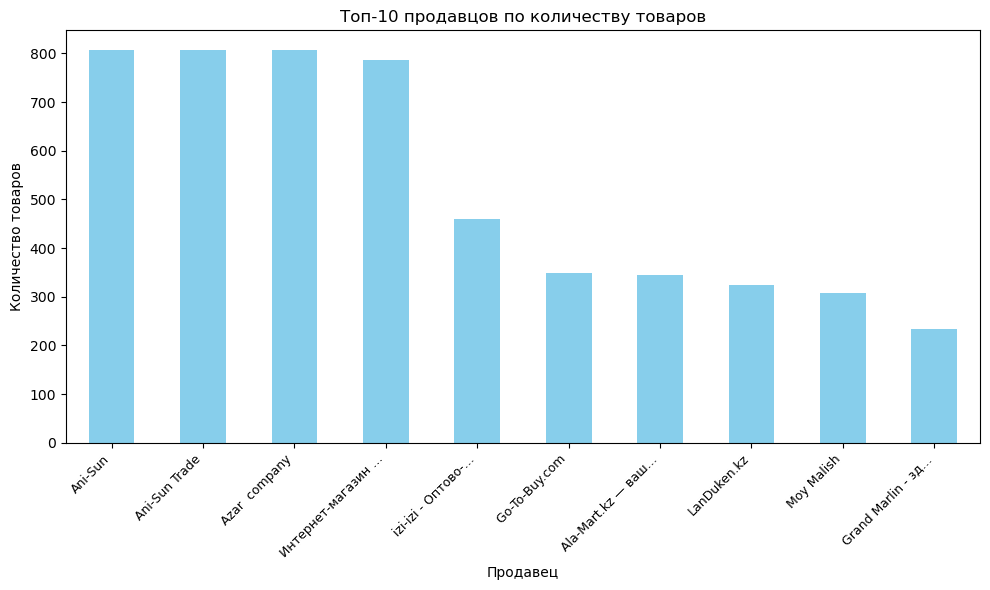

In [111]:
import matplotlib.pyplot as plt

labels = [name if len(name) <= 20 else name[:17] + '…' for name in top_sellers.index]

plt.figure(figsize=(10,6))
top_sellers.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Количество товаров')
plt.xlabel('Продавец')
plt.title('Топ-10 продавцов по количеству товаров')

plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right', fontsize=9)

plt.tight_layout()
plt.show()


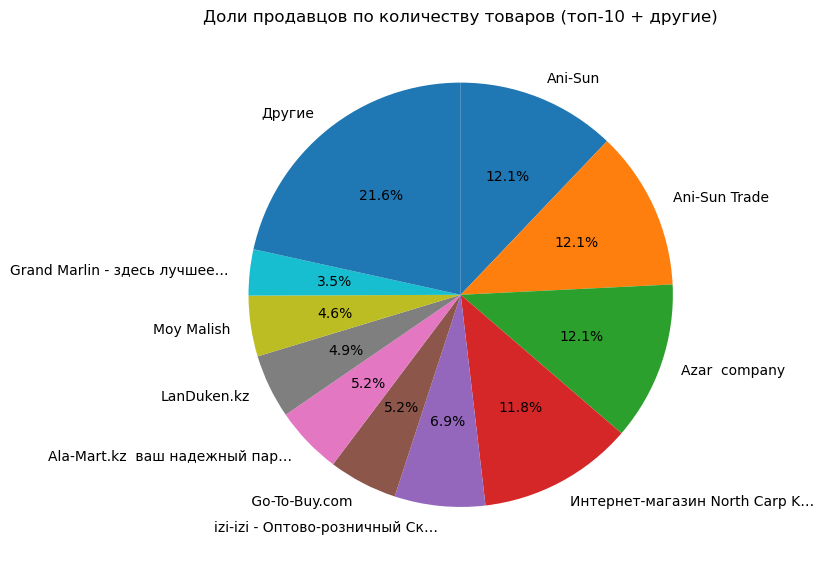

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("satu_products_and_services_pages_cleaned.csv")

seller_counts = df['seller'].value_counts()
top_sellers = seller_counts.head(10)
other_count = seller_counts.iloc[10:].sum()

counts = pd.concat([top_sellers, pd.Series({'Другие': other_count})])

def remove_emoji(text):
    return re.sub(r'[^\w\s.,-]', '', text)
labels = [remove_emoji(name) if len(name) <= 20 else remove_emoji(name)[:29]+'…' for name in counts.index]

plt.figure(figsize=(8, 8))
def absolute_value(val):
    a = int(round(val / 100. * counts.sum()))
    return f'{a:,}'.replace(',', ' ')

plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  
    startangle=90,
    counterclock=False
)
plt.title('Доли продавцов по количеству товаров (топ-10 + другие)')
plt.tight_layout()
plt.show()


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("satu_products_and_services_pages_cleaned.csv")
top10_expensive = df.sort_values(by='price', ascending=False).head(10)
top10_expensive.to_csv("satu_products_top10.csv", index=False, encoding="utf-8-sig")
top10_expensive

name  \
475  Станок шиномонтажный для грузовых а/м Hofmann ...   
6    Фрезерный станок Philden S510 -5 осевой для су...   
424  Станок шиномонтажный для грузовых а/м Hofmann ...   
460  Станок шиномонтажный для грузовых а/м Hofmann ...   
7        Philden PF300S Печь для синтеризации циркония   
586            Аппарат прессотерапии Lympha Press Mini   
911  Теннисный стол Donic Premium 30 ITTF (с сеткой...   
976  Теннисный стол Donic Premium 30 ITTF (с сеткой...   
621                              Тестораскатка бабочка   
767                    Печь конвекционная PIRON PF7504   

                                           description      price  \
475  Купить Станок шиномонтажный для грузовых ам Ho...  9152261.0   
6    Купить Фрезерный станок Philden S510 -5 осевой...  7900000.0   
424  Купить Станок шиномонтажный для грузовых ам Ho...  7825918.0   
460  Купить Станок шиномонтажный для грузовых ам Ho...  6232482.0   
7    Купить Philden PF300S Печь для синтеризации ци...  2790000.0   
586  Купить Аппарат прессотерапии Lympha Press Mini...   888000.0   
911  Купить Теннисный стол Donic Premium 30 ITTF (с...   825000.0   
976  Купить Теннисный стол Donic Premium 30 ITTF (с...   825000.0   
621            Купить Тестораскатка бабочка на satu.kz   769000.0   
767  Купить Печь конвекционная PIRON PF7504 на satu.kz   689250.0   

    availability                                             seller  
475    В наличии                      ТОО КазТехнолоджиГрупп Алматы  
6      В наличии                                    ТОО Дельта Фарм  
424    В наличии                      ТОО КазТехнолоджиГрупп Алматы  
460    В наличии                      ТОО КазТехнолоджиГрупп Алматы  
7      В наличии                                    ТОО Дельта Фарм  
586    В наличии                        Интернет магазин massagerKZ  
911    В наличии  Профессиональный бильярдный магазин &quot;Боль...  
976    В наличии  Профессиональный бильярдный магазин &quot;Боль...  
621    В наличии                                        Torgline.kz  
767    В наличии                           TOO &quot;KOIBAGAR&quot;

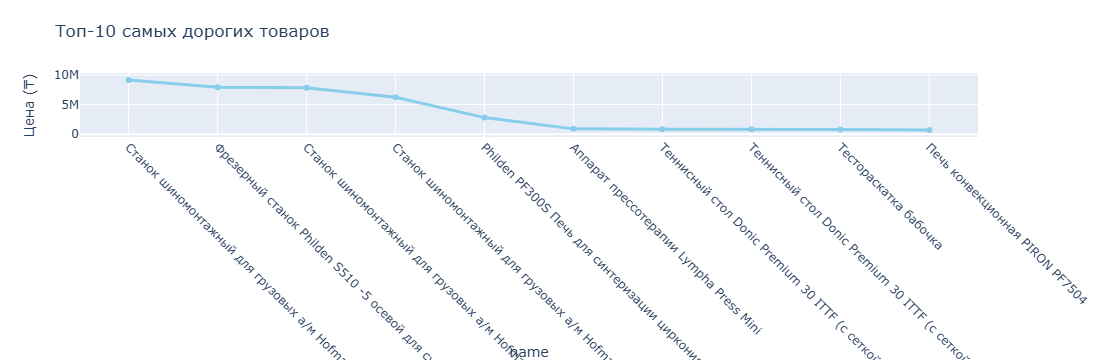

In [120]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("satu_products_top10.csv")

fig = px.line(df, x='name', y='price', title='Топ-10 самых дорогих товаров')
fig.update_traces(mode='lines+markers', line=dict(color='skyblue', width=3))

fig.update_xaxes(tickangle=45)  
fig.update_yaxes(title='Цена (₸)')

fig.update_traces(text=[f'{int(p):,}' for p in df['price']], textposition='top center')

fig.show()


<h1>Nedvizhka.kz</h1>

<h2>Scrapping</h2>

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

base_url = 'https://nedvizhka.kz/posts/NaN?page={}&viewType=list&onlyComplexLayouts=0&onlySecondary=0&buildingType_id=NaN'

headers = {
    'User-Agent': 'Mozilla/5.0'
}

session = requests.Session()
session.headers.update(headers)

data = []

for page in range(1, 600):
    url = base_url.format(page)
    resp = session.get(url, timeout=10)
    soup = BeautifulSoup(resp.content, 'html.parser')

    listings = soup.find_all('div', class_='postCard')
    if not listings:
        print(f'Нет объявлений на странице {page}.')
        break

    for l in listings:
        title_tag = l.select_one('a.postTitle')
        title = title_tag.text.strip() if title_tag else ''

        price_tag = l.select_one('b')
        price = price_tag.text.strip() if price_tag else ''

        loc_tag = l.select_one('p.postAddress')
        location = loc_tag.text.strip() if loc_tag else ''

        city_tag = l.select_one('span.car-city')
        city = city_tag.text.strip() if city_tag else ''

        desc_tag = l.select_one('p.description-two-lines')
        description = desc_tag.text.strip() if desc_tag else ''

        seller_type = ''
        
        # Новостройка
        
        new_building_tag = l.select_one('span.tag.is-info span')
        if new_building_tag and new_building_tag.get_text(strip=True) == 'Новостройка':
            seller_type = 'Новостройка'
            
        # частное лицо
        
        if not seller_type:
            private_tag = l.select_one('span.tag.is-success.is-small span')
            if private_tag:
                seller_type = private_tag.get_text(strip=True)
                
        # имя / агент
        
        if not seller_type:
            span_name = l.select_one('span.name')
            if span_name:
                seller_type = span_name.get_text(strip=True)
                
        # агентство
        
        if not seller_type:
            strong_name = l.select_one('strong.name')
            if strong_name:
                seller_type = strong_name.get_text(strip=True)

        size = ''
        rooms = ''
        property_type = 'другое'

        size_match = re.search(r'(\d+(?:[.,]\d+)?)\s*м²', title)
        if size_match:
            size = size_match.group(1)

        rooms_match = re.search(r'(\d+)-комнатн', title.lower())
        if rooms_match:
            rooms = rooms_match.group(1)

        if 'квартир' in title.lower():
            property_type = 'квартира'
        elif 'дом' in title.lower():
            property_type = 'дом'
        elif 'бизнес' in title.lower():
            property_type = 'бизнес'
        elif 'участок' in title.lower():
            property_type = 'участок'

        data.append({
            'Property type': property_type,
            'Price': price,
            'Size (m2)': size,
            'City': city,  
            'Location': location,               
            'Rooms': rooms,
            'Seller type': seller_type,
            'Description': description
        })

    time.sleep(2)

df = pd.DataFrame(data)

df['Rooms'] = df.apply(
    lambda row: row['Property type'] if pd.isna(row['Rooms']) or row['Rooms'] == '' else row['Rooms'],
    axis=1
)

df.to_csv('nedvizhka_listings3.csv', index=False, encoding='utf-8-sig')
df


Нет объявлений на странице 501.


Property type          Price Size (m2)                       City  \
0         квартира   27 000 000 ₸        68            Улытауская обл.   
1         квартира   67 300 000 ₸        68                     Астана   
2         квартира   22 000 000 ₸        54  Северо-Казахстанская обл.   
3         квартира   47 000 000 ₸       190        Карагандинская обл.   
4         квартира   37 512 000 ₸        52                     Алматы   
...            ...            ...       ...                        ...   
9995      квартира   41 000 000 ₸        60                     Алматы   
9996      квартира   36 000 000 ₸        45                     Алматы   
9997      квартира   34 500 000 ₸        45                     Алматы   
9998      квартира  100 000 000 ₸        95                     Астана   
9999           дом   26 000 000 ₸        75              Абайская обл.   

                                               Location Rooms  \
0                                Жезказган, Гагарина 39     2   
1     Алматы р-н, Тыныбаева  10, Жилой комплекс ЖК S...     2   
2     Петропавловск, Брусиловского  34 - Букетова На...     2   
3       Караганда, Казыбек би р-н, Нуркена Абдирова  51     5   
4     Бостандыкский р-н, ул. Талды 63, Жилой комплек...     1   
...                                                 ...   ...   
9995                                         Радостовца     3   
9996                                         Тимирязева     2   
9997                                           22-линия     2   
9998  Кабанбай батыра 43В, Жилой комплекс Highvill Park     3   
9999                 Семей, Ул 8 марта 82 - Найманбаева     4   

                            Seller type  \
0                          частное лицо   
1                          частное лицо   
2                          частное лицо   
3                          частное лицо   
4                           Новостройка   
...                                 ...   
9995  Линда Зегхад - агент недвижимости   
9996  Линда Зегхад - агент недвижимости   
9997  Линда Зегхад - агент недвижимости   
9998                      Идрис - Метры   
9999                       частное лицо   

                                            Description  
0     1994 г.п.,состояние: хорошее,жилая пл.: 36.4 м...  
1     2025 г.п.,состояние: хорошее,жилая пл.: 68.0 м...  
2     1986 г.п.,состояние: хорошее,жилая пл.: 29.0 м...  
3     1963 г.п.,состояние: хорошее,жилая пл.: 121.4 ...  
4                                             2023 г.п.  
...                                                 ...  
9995          1961 г.п.,состояние: хорошее,потолки: 3.0  
9996  1963 г.п.,состояние: среднее,потолки: 3.0,парк...  
9997  1963 г.п.,состояние: хорошее,санузел: совмещен...  
9998                   2018 г.п.,санузел: 2 с/у и более  
9999  1986 г.п.,состояние: хорошее,жилая пл.: 70.0 м...  

[10000 rows x 8 columns]

<h2>Cleaning</h2>

In [19]:
import pandas as pd

df = pd.read_csv("nedvizhka_listings3.csv")

df = df.drop_duplicates()

df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df = df.dropna(subset=['Rooms'])
df['Rooms'] = df['Rooms'].astype(int)

df['Year'] = pd.to_numeric(df['Description'].str[:4], errors='coerce')
df = df[df['Year'] <= 2026].copy()
df['Year'] = df['Year'].astype(int)


df['Price'] = (df['Price']
               .astype(str)
               .str.replace(r'\s+', '', regex=True)
               .str.replace('₸', '', regex=False)
               .astype(float))

df = df.dropna(subset=['Property type', 'Price', 'Size (m2)','City', 'Location', 'Rooms', 'Seller type', 'Description', 'Year'])
df.to_csv('nedvizhka_listings3_no_dupl_cleaned_rooms.csv', index=False, encoding='utf-8-sig')
df 


Property type        Price  Size (m2)                       City  \
0         квартира   27000000.0       68.0            Улытауская обл.   
1         квартира   67300000.0       68.0                     Астана   
2         квартира   22000000.0       54.0  Северо-Казахстанская обл.   
3         квартира   47000000.0      190.0        Карагандинская обл.   
4         квартира   37512000.0       52.0                     Алматы   
...            ...          ...        ...                        ...   
9995      квартира   41000000.0       60.0                     Алматы   
9996      квартира   36000000.0       45.0                     Алматы   
9997      квартира   34500000.0       45.0                     Алматы   
9998      квартира  100000000.0       95.0                     Астана   
9999           дом   26000000.0       75.0              Абайская обл.   

                                               Location  Rooms  \
0                                Жезказган, Гагарина 39      2   
1     Алматы р-н, Тыныбаева  10, Жилой комплекс ЖК S...      2   
2     Петропавловск, Брусиловского  34 - Букетова На...      2   
3       Караганда, Казыбек би р-н, Нуркена Абдирова  51      5   
4     Бостандыкский р-н, ул. Талды 63, Жилой комплек...      1   
...                                                 ...    ...   
9995                                         Радостовца      3   
9996                                         Тимирязева      2   
9997                                           22-линия      2   
9998  Кабанбай батыра 43В, Жилой комплекс Highvill Park      3   
9999                 Семей, Ул 8 марта 82 - Найманбаева      4   

                            Seller type  \
0                          частное лицо   
1                          частное лицо   
2                          частное лицо   
3                          частное лицо   
4                           Новостройка   
...                                 ...   
9995  Линда Зегхад - агент недвижимости   
9996  Линда Зегхад - агент недвижимости   
9997  Линда Зегхад - агент недвижимости   
9998                      Идрис - Метры   
9999                       частное лицо   

                                            Description  Year  
0     1994 г.п.,состояние: хорошее,жилая пл.: 36.4 м...  1994  
1     2025 г.п.,состояние: хорошее,жилая пл.: 68.0 м...  2025  
2     1986 г.п.,состояние: хорошее,жилая пл.: 29.0 м...  1986  
3     1963 г.п.,состояние: хорошее,жилая пл.: 121.4 ...  1963  
4                                             2023 г.п.  2023  
...                                                 ...   ...  
9995          1961 г.п.,состояние: хорошее,потолки: 3.0  1961  
9996  1963 г.п.,состояние: среднее,потолки: 3.0,парк...  1963  
9997  1963 г.п.,состояние: хорошее,санузел: совмещен...  1963  
9998                   2018 г.п.,санузел: 2 с/у и более  2018  
9999  1986 г.п.,состояние: хорошее,жилая пл.: 70.0 м...  1986  

[9559 rows x 9 columns]

In [17]:
import pandas as pd
df = pd.read_csv("nedvizhka_listings3_no_dupl.csv")
df['Price'] = (df['Price']
               .astype(str)                      
               .str.replace(r'\s+', '', regex=True)  
               .str.replace('₸', '', regex=False)    
               .astype(float))  

df['Price per m2'] = round(df['Price'] / df['Size (m2)'], 2)
df[["Property type", "Price", "Size (m2)","Price per m2"]]

Property type        Price  Size (m2)  Price per m2
0         квартира   27000000.0       68.0     397058.82
1         квартира   67300000.0       68.0     989705.88
2         квартира   22000000.0       54.0     407407.41
3         квартира   47000000.0      190.0     247368.42
4         квартира   37512000.0       52.0     721384.62
...            ...          ...        ...           ...
9891      квартира   41000000.0       60.0     683333.33
9892      квартира   36000000.0       45.0     800000.00
9893      квартира   34500000.0       45.0     766666.67
9894      квартира  100000000.0       95.0    1052631.58
9895           дом   26000000.0       75.0     346666.67

[9896 rows x 4 columns]

<h2>Prediction</h2>

In [72]:
min_year = df['Year'].min()
print(min_year)

1950


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv("nedvizhka_listings3_no_dupl_cleaned_rooms.csv")

df = df[['Price', 'Size (m2)', 'Rooms', 'Property type', 'Year', 'City']]
df = df.dropna()

df['Rooms'] = pd.to_numeric(df['Rooms'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Rooms', 'Year'])

df_encoded = pd.get_dummies(df, columns=['Property type', 'City'], drop_first=True)

X = df_encoded.drop('Price', axis=1) #we need axis = 1 to drop column not row
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

allowed_types = ['участок', 'бизнес', 'дом', 'квартира', 'другое']

allowed_cities = [
    'Алматы','Астана','Шымкент','Акмолинская обл.','Актюбинская обл.','Алматинская обл.',
    'Атырауская обл.','Восточно-Казахстанская обл.','Жамбылская обл.','Западно-Казахстанская обл.',
    'Карагандинская обл.','Костанайская обл.','Кызылординская обл.','Мангистауская обл.',
    'Павлодарская обл.','Северо-Казахстанская обл.','Туркестанская обл.','Абайская обл.',
    'Жетысуская обл.','Улытауская обл.','Зарубежная недвижимость'
]

try:
    rooms_input = int(input("Введите количество комнат (1, 2, 3, 4+)(только цифрами): ").strip())
    
    while True:
        prop_type = input("Введите тип недвижимости ('участок','бизнес','дом','квартира','другое'): ").strip().lower()
        if prop_type in allowed_types:
            break
        else:
            print("Ошибка! Введите одно из следующих значений:", ", ".join(allowed_types))

    while True:
        year_input = input("Введите год постройки (от 1950 до 2026): ").strip()
        if year_input.isdigit() and 1950 <= int(year_input) <= 2026:
            year_input = int(year_input)
            break
        else:
            print("Ошибка! Введите число от 1950 до 2026")

    while True:
        city_input = input("Введите город/область: ").strip()
        if city_input in allowed_cities:
            break
        else:
            print("Ошибка! Введите одно из списка:", ", ".join(allowed_cities))

    size_from = float(input("Введите минимальную площадь (m2) (только цифрами): "))
    size_to = float(input("Введите максимальную площадь (m2)(только цифрами): "))
    size_val = (size_from + size_to) / 2

    new_row = pd.DataFrame({
        'Size (m2)': [size_val],
        'Rooms': [rooms_input],
        'Year': [year_input],
    })

    for col in X_train.columns:
        if col not in new_row.columns:
            new_row[col] = 0

    for col in X_train.columns:
        if prop_type in col.lower():
            new_row[col] = 1

    for col in X_train.columns:
        if city_input in col:
            new_row[col] = 1

    pred = model.predict(new_row[X_train.columns])[0]
    print(f"\nПримерная цена: {pred:,.0f} ₸")

except ValueError:
    print("Неверный ввод данных. Попробуйте еще раз.")


Введите количество комнат (1, 2, 3, 4+)(только цифрами):  2
Введите тип недвижимости ('участок','бизнес','дом','квартира','другое'):  квартира
Введите год постройки (от 1950 до 2026):  2020
Введите город/область:  Астана 
Введите минимальную площадь (m2) (только цифрами):  50
Введите максимальную площадь (m2)(только цифрами):  70



Примерная цена: 34,556,442 ₸


In [22]:
df_encoded 

Price  Size (m2)  Rooms  Year  Property type_другое  \
0      27000000.0       68.0      2  1994                 False   
1      67300000.0       68.0      2  2025                 False   
2      22000000.0       54.0      2  1986                 False   
3      47000000.0      190.0      5  1963                 False   
4      37512000.0       52.0      1  2023                 False   
...           ...        ...    ...   ...                   ...   
9554   41000000.0       60.0      3  1961                 False   
9555   36000000.0       45.0      2  1963                 False   
9556   34500000.0       45.0      2  1963                 False   
9557  100000000.0       95.0      3  2018                 False   
9558   26000000.0       75.0      4  1986                 False   

      Property type_квартира  City_Абайская обл.  City_Акмолинская обл.  \
0                       True               False                  False   
1                       True               False                  False   
2                       True               False                  False   
3                       True               False                  False   
4                       True               False                  False   
...                      ...                 ...                    ...   
9554                    True               False                  False   
9555                    True               False                  False   
9556                    True               False                  False   
9557                    True               False                  False   
9558                   False                True                  False   

      City_Актюбинская обл.  City_Алматинская обл.  ...  \
0                     False                  False  ...   
1                     False                  False  ...   
2                     False                  False  ...   
3                     False                  False  ...   
4                     False                  False  ...   
...                     ...                    ...  ...   
9554                  False                  False  ...   
9555                  False                  False  ...   
9556                  False                  False  ...   
9557                  False                  False  ...   
9558                  False                  False  ...   

      City_Кызылординская обл.  City_Кызылту  City_Кыргауылды  \
0                        False         False            False   
1                        False         False            False   
2                        False         False            False   
3                        False         False            False   
4                        False         False            False   
...                        ...           ...              ...   
9554                     False         False            False   
9555                     False         False            False   
9556                     False         False            False   
9557                     False         False            False   
9558                     False         False            False   

      City_Мангистауская обл.  City_Павлодарская обл.  \
0                       False                   False   
1                       False                   False   
2                       False                   False   
3                       False                   False   
4                       False                   False   
...                       ...                     ...   
9554                    False                   False   
9555                    False                   False   
9556                    False                   False   
9557                    False                   False   
9558                    False                   False   

      City_Северо-Казахстанская обл.  City_Талдыбулак  \
0                              False            False   
1                

In [71]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 11922340.851520639
R²: 0.3382809493833755


<h2>Visualizations</h2>

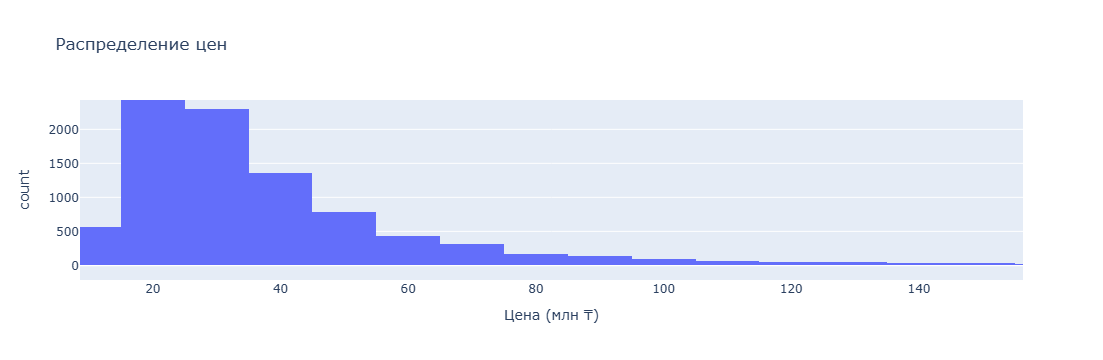

In [94]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('nedvizhka_listings3_no_dupl_cleaned_rooms.csv')
fig = px.histogram(
    df, 
    x=df['Price']/1e6, 
    nbins=50,
    labels={'x': 'Цена (млн ₸)', 'count': 'Количество объявлений'},
    title='Распределение цен'
)
fig.update_traces(xbins=dict(size=10))
fig.show()


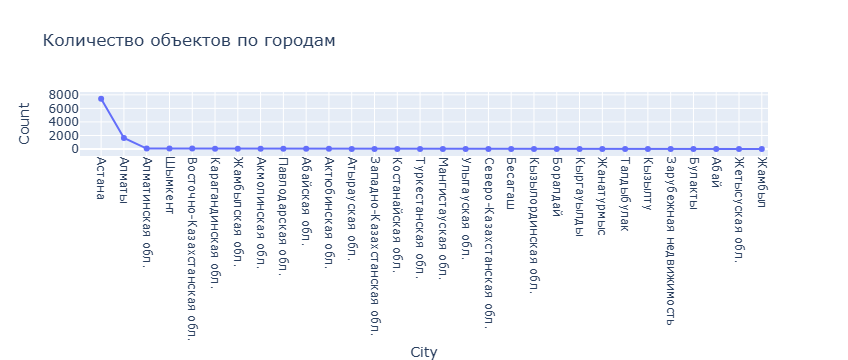

In [88]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('nedvizhka_listings3_no_dupl_cleaned_rooms.csv')
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

city_counts = city_counts.sort_values('Count', ascending=False)

fig = px.line(city_counts, x='City', y='Count', title='Количество объектов по городам')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickangle=90)
fig.show()


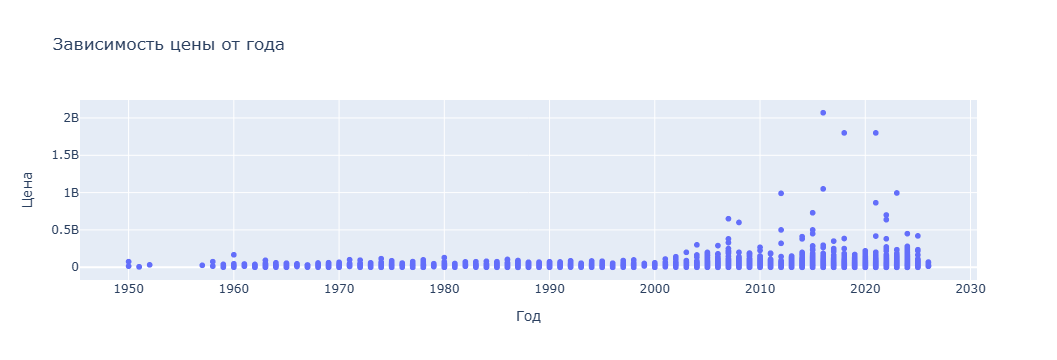

In [26]:
import plotly.express as px
df = pd.read_csv('nedvizhka_listings3_no_dupl_cleaned_rooms.csv')
fig = px.scatter(
    df, 
    x='Year', 
    y='Price', 
    title='Зависимость цены от года'  
)
fig.update_yaxes(title='Цена')
fig.update_xaxes(title='Год')
fig.show()
